# Assignment 3 - Supervised Learning

## *Joaquin Menendez*
Netid:  *jm622*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)** What is the likelihood function of the data that we will wish to maximize?

$$L(x) = P(Y|X) = \prod_{i=1}^{N} [f(Y = y_i | X =x_i)]_{y_{i=1}} [Y = y_i | X =x_i)]_{y_{i=0}}$$

$$= \prod_{i=1}^{N} [\dfrac{1}{1+e^{-mx_i}}]_{y_{i=1}} \: [1 - \dfrac{1}{1+e^{-mx_i}}]_{y_{i=0}}$$

$$L(x) = \prod_{i=1}^{N} (\dfrac{1}{1+e^{-mx_i}})^{y_i} \: (\dfrac{e^{-mx_i}}{1+e^{-mx_i}})^{1-y_i}$$

**(b)** Since a logarithm is a monotonic function, maximizing the  f(x)f(x)  is equivalent to maximizing  ln[f(x)]ln⁡[f(x)] . Express part (a) as a cost function of the model parameters,  C(w)C(w) , that is the negative of the logarithm of (a).

The cost function used in logistic regression is the cross entropy
$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\hat{y})+ (1-y_i)\: \log(1-\hat{y}))$$

$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\dfrac{1}{1+e^{-mx_i}}) + (1 - y_i)\: \log(\dfrac{e^{-mx_i}}{1+e^{-mx_i}})$$

$$ C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i(\log(1) - \log(1+e^{-mx_i})) + (1 - y_i)\:(\log(e^{-mx_i}) - \log(1+e^{-mx_i})) $$

$$ C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} \log(e^{-mx_i})(1-y_i) - (\log (1 + e^{-mx_i}))$$

$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} \log(e^{-wx_i})(1-y_i) - (\log(1+e^{-wx_i}))$$
$$C(w) =  \dfrac{1}{N} \sum_{i = 1}^{N} wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$

**(c)**
$$\frac{\partial C}{\partial w} = \dfrac{1}{N} \sum_{i = 1}^{N}  wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$


$$ =  \dfrac{1}{N} \sum_{i = 1}^{N} x_i(1-y_i) + \left( \frac{1}{1+e^{-wx_i}} e^{-wx_i} (-x_i)\right)$$

$$ = \dfrac{1}{N} \sum_{i = 1}^{N}  x_i(1-y_i)  - (\frac{x_i e^{-wx_i}}{1+e^{-wx_i}})$$

$$ \frac{\partial C}{\partial w}=  \dfrac{1}{N} \sum_{i = 1}^{N}  x_i \left( (1-y_i) -  \frac{x_i e^{-wx_i}}{1+e^{-wx_i}}\right)$$

So, for $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$ = 



$$\big[\frac{\nabla (w)}{w_0} , 
\frac{\nabla (w)}{w_1} ,
\frac{\nabla (w)}{w_2} \big]$$

$$\begin{bmatrix} \dfrac{1}{N} \sum_{i = 1}^{N} (1-y_i)\: - \frac{e^{-w}}{1+e^{-w}} , \\
 \dfrac{1}{N} \sum_{i = 1}^{N}   \left( x_{i,1}(1-y_i)\: - \frac{e^{-wx_{i,1}}}{1+e^{-wx_{i,1}}}\right) , \\
 \dfrac{1}{N} \sum_{i = 1}^{N} \left( x_{i,2}(1-y_i)\: - \frac{e^{-wx_{i,2}}}{1+e^{-wx_{i,2}}}\right) \end{bmatrix}$$

**(d)**

The gradient update equation is defined as $$ x^{(x+i)} = x^i - \eta \nabla f(x^i)$$

given that sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}$ We could replace $\frac{e^{-wx_{i,1}}}{1+e^{-wx_{i,1}}}$ as $1 - \sigma(W^T x_i)$

$$wj = wj - \dfrac{\eta}{N} \sum_{i = 1}^{N}  x_{i}\left((1-y_i)\: - (1-\sigma(\mathbf{w}^T \mathbf{x}_i)\right)$$

$$wj = wj - \dfrac{\eta}{N} \sum_{i = 1}^{N}  x_{i}\left(-y_i + \sigma(\mathbf{w}^T \mathbf{x}_i)\right)$$

until $wj$ converge on one point.

**(e)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
df = pd.read_csv('./data/A3_Q1_data.csv')

[]

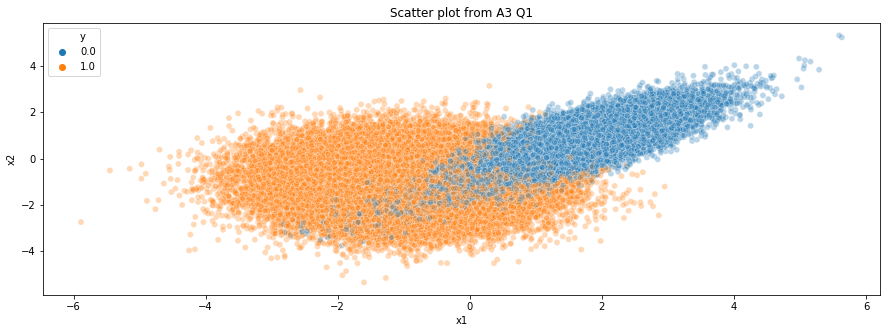

In [2]:
plt.figure(figsize=(15,5))
g = seaborn.scatterplot(x = 'x1', y ='x2', hue = 'y', alpha = 0.3, data = df)
plt.title('Scatter plot from A3 Q1')
g.plot()

The data seem to be separable. The class 1 seems to have a lower median than class 2, also the range of x values is evidently more positive to the class 0 than class 1.
Nevertheles, data does not seem to be the best candidate for a logistic regression. Given the fact that the class 1 seems to surround part of class 0, there is no way of divide these categories  using a sigmoid curve without having False Negatives. A better approach would be use a QDA model to classify the data. Given that QDA assumes a quadratic decision boundary it would be more adequate 'adjust' the decision boundaryto the shape shown in the data.

**(f)**

In [3]:
df.info() # There is no evidence of null values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
x1    100000 non-null float64
x2    100000 non-null float64
y     100000 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


Text(0.5,0.98,'Histogram of predictor variables')

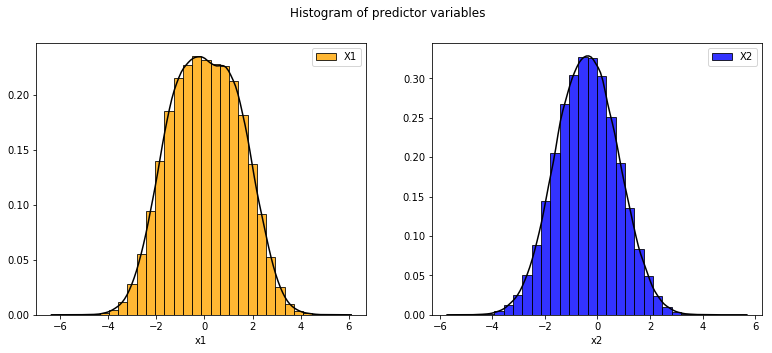

In [4]:
fig, (ax1,ax2) =plt.subplots(1,2) #we plot the distribution of the predictors
seaborn.distplot(df['x1'], kde = True, bins= 30, color= 'orange', hist_kws = {'edgecolor' : 'black', 'alpha': .8}, kde_kws={'color':'black'}, label= 'X1', ax= ax1)
seaborn.distplot(df['x2'], kde = True, bins= 30, color= 'b', hist_kws = {'edgecolor' : 'black', 'alpha': .8}, kde_kws={'color':'black'}, label= 'X2', ax= ax2)
ax1.legend()
ax2.legend()
fig.set_figheight(5)
fig.set_figwidth(13)
plt.suptitle('Histogram of predictor variables')

In [5]:
df.corr() # We evaluate the correlation between the predictors and the output

,x1,x2,y
x1,1.000000,0.624645,-0.724029
x2,0.624645,1.000000,-0.515814
y,-0.724029,-0.515814,1.000000


There are no mayor differences between the classes. Both seems to have similar SD and N sample. Also, there are no missing values in any of the classes. The data do not seem to need any type of preprocessing. The fact that both parameters have a normal distribution (even tought with different means and SD) and that they seem to have a different correlations against the predictor (despite of not being extremely different) suggest again that QDA could be a more adequate model.

**(g)**

In [158]:
# New and upgrade function
def logistic_prob_2 (dataset,weight):
    values = dataset @ weight.T 
    return 1/(1+np.exp(-values)).reshape(1,-1) # List of len = to dataset rows 

**(h)**

In [159]:
# make a new and better cost funct
def cost_function_2(dataset,weight):  
    x = dataset.drop(['y'], axis = 1)
    x.insert(0,'x0',np.array([1]*dataset.shape[0])) # will add a column of ones as X0 to the dataframe so I can feed with a df format.
    y = dataset['y'].values
    x = x.values
    prob_y = logistic_prob_2(x,weight)   
    
    cost = np.where(y== 0,np.log(1-prob_y), np.log(prob_y))
    sum_cost = np.sum(cost)/(x.shape[0] * -1)
    return sum_cost

In [196]:
stopping_criteria = 0.000001
w = np.array([[1,1,1]])
cost_function_2(train,w) #My cost function estimates the cost given the 3 weights. This function is more efficient. Go with this
dummy = np.array([[1,1,1]])
logistic_prob_2(dummy,w) #Testing my sigmoid func

array([[0.95257413]])

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.


In [150]:
#train_df = df.sample(frac=.70, replace= False)
from sklearn.model_selection import train_test_split # Splitting train/test data
train, test = train_test_split(df, test_size=0.3)

In [155]:
def prob_single_data_2(dataset,w,learning_rate):   #[upgraded function] it calculates all inside the grad_des function
    x = dataset.drop(['y'], axis = 1)
    x.insert(0,'x0',np.array([1]*dataset.shape[0])) # will add a column of ones as X0 to the dataframe
    y = dataset['y'].values
    x = x.values
    #print(x.shape)
    sigmoid = logistic_prob_2(x,w) # call sigmoid fuction
    sig_y = (sigmoid - y).reshape(-1,1).T
    inside_sum = sum(sig_y @ x)
    #return  sig_y, y, x
    return (learning_rate/x.shape[0]) * inside_sum

In [156]:
def grad_desc(dataset,w,learning_rate, stopping_criteria):
    wj_old = w
    wj_delta  = 1
    cost = []
    while wj_delta > stopping_criteria:
        wj = wj_old -  prob_single_data_2(dataset,wj_old,learning_rate)
        cost.append(cost_function_2(dataset,wj_old))
        wj_delta = np.linalg.norm(wj_old - wj) #estimate ell2 for the substraction of my weights
        #print('wj delta :', wj_delta)
        wj_old = wj 
    return wj, cost   


**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

In [14]:
w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) #Initialize randomly some weights
learning_rate = 0.5 #eta learning rate should be something close to 10-3 to 10-6
stopping_criteria = 0.000001
weights1, cost1 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.25
weights2, cost2 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.1
weights3, cost3 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.01
weights4, cost4 = grad_desc(train,w,learning_rate,stopping_criteria)

In [15]:
learning_rate = 5
weights5, cost5 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 7
weights6, cost6 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 10
weights7, cost7 = grad_desc(train,w,learning_rate,stopping_criteria)

C:\Users\joaqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


**(h)**

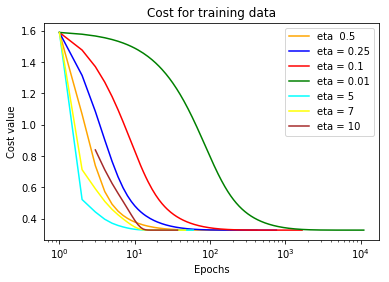

In [17]:
plt.title('Cost for training data')
plt.xlabel('Epochs')
plt.ylabel('Cost value')
plt.semilogx()
plots = [cost1,cost2,cost3,cost4,cost5,cost6,cost7]
labels = ['eta  0.5','eta = 0.25','eta = 0.1','eta = 0.01', 'eta = 5', 'eta = 7', 'eta = 10']
colors = ['orange','b','r','g','cyan','yellow','brown']
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)

(0.3, 0.5)

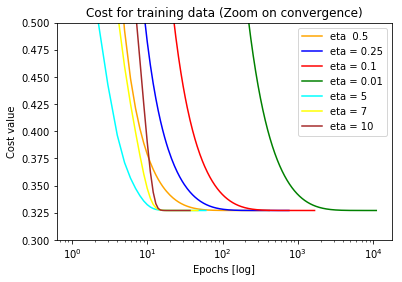

In [18]:
plt.title('Cost for training data (Zoom on convergence)')
plt.xlabel('Epochs [log]')
plt.ylabel('Cost value')
plt.semilogx()
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)
plt.ylim([0.3,.5])

In [19]:
print('Lower eta',weights1,weights2,weights3,weights4,'High eta',weights5,weights6,weights7, sep = '\n') # All arrive to the same value

Lower eta
[[-0.18804573 -1.92345054 -0.41807248]]
[[-0.18801238 -1.92347458 -0.4180412 ]]
[[-0.18791114 -1.92354072 -0.41794718]]
[[-0.18633247 -1.92403623 -0.41655604]]
High eta
[[-0.18807465 -1.92342825 -0.41809981]]
[[-0.18807563 -1.92342745 -0.41810075]]
[[-0.18807644 -1.92342682 -0.41810146]]


In [59]:
w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) #Initialize randomly some weights
learning_rate = 0.5 #eta learning rate should be something close to 10-3 to 10-6
stopping_criteria = 0.000001
test_weights1, test_cost1 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.25
test_weights2, test_cost2 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.1
test_weights3, test_cost3 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.01
test_weights4, test_cost4 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 5
test_weights5, test_cost5 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 7
test_weights6, test_cost6 = grad_desc(train,w,learning_rate,stopping_criteria)

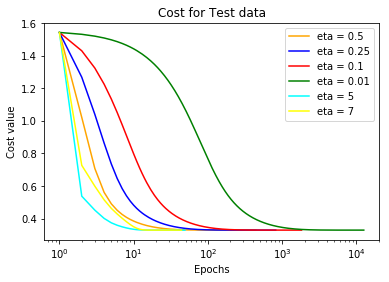

In [29]:
plt.title('Cost for Test data')
plt.xlabel('Epochs [log]')
plt.ylabel('Cost value')
plt.semilogx()
plots = [test_cost1,test_cost2,test_cost3,test_cost4, test_cost5, test_cost6]
labels = ['eta = 0.5','eta = 0.25','eta = 0.1','eta = 0.01', 'eta = 5' , 'eta = 7']
colors = ['orange','b','r','g','cyan','yellow']
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)

What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

When we use a smaller learning rate the time needed to converge increase.  At the same time we see that when we increase the learning rate the algorithm also needs more iterations.Given that the descend is smoother in the bigger the eta,  we could argue that this weights are going to be more precise when they converge.  Despite the fact that there is a difference in the weights decreasing w0 and w2 when the eta is lower, there is no evidence of a big difference. We could proceed from now with a eta = 0.1 given the cost/precision. 

In [20]:
learning_rate = 0.1
w = weights3 #eta 0.1

(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance.

Text(0.5,1,'Probability of being Class 1 for x1 and x2')

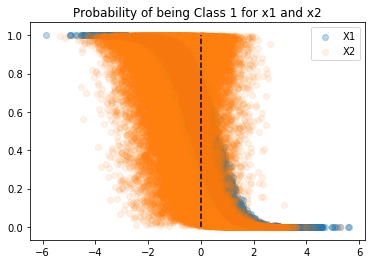

In [21]:
#First I want to check my results using the weights from my gradient fucntion. This would be using all my training dataset: 
# X = x1, x2
# Y = y
X = train.drop(['y'], axis = 1)
X.insert(0,'x0',np.array([1]*train.shape[0])) # will add a column of ones as X0 to the dataframe
y = train['y'].values
X = X.values  #Scikit does not like pandas
plt.scatter(X[:,1],logistic_prob_2(X,w).T, label='X1', alpha = 0.3)
plt.scatter(X[:,2],logistic_prob_2(X,w).T, label = 'X2', alpha = 0.1)
plt.vlines(x= 0, ymin= 0 , ymax= 1, linestyles='--')
plt.legend()
plt.title('Probability of being Class 1 for x1 and x2')


In [194]:
import sklearn as sk
import scipy as sp
model = sk.model_selection.StratifiedKFold(n_splits=10)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
[0.99294668 0.03900728 0.00532263 ... 0.89066688 0.9987143  0.77775361] [1. 0. 0. ... 1. 1. 1.] 7001 7001
[0.58931406 0.01777794 0.67769084 ... 0.54211336 0.02295939 0.06209335] [0. 0. 0. ... 0. 0. 0.] 7001 7001
[0.96938342 0.6700968  0.79934962 ... 0.6579359  0.99543691 0.84278089] [1. 1. 1. ... 1. 1. 1.] 7001 7001
[0.131587   0.00094996 0.94931496 ... 0.01694749 0.00977968 0.00764135] [0. 0. 1. ... 0. 0. 0.] 7001 7001
[0.57227236 0.99557183 0.70255205 ... 0.37717524 0.93237073 0.58652016] [1. 1. 1. ... 1. 1. 1.] 7001 7001
[0.60670157 0.16232189 0.01995562 ... 0.77265822 0.48982905 0.18430744] [0. 0. 0. ... 0. 0. 0.] 6999 6999
[0.71025072 0.84870382 0.92158199 ... 0.13907027 0.00548477 0.02204807] [1. 1. 1. ... 0. 0. 0.] 6999 6999
[0.55297378 0.97060168 0.94465911 ... 0.9976815  0.86062781 0.84690978] [1. 1. 1. ... 1. 1. 1.] 6999 6999
[0.04754372 0.14796667 0.21812793 ... 0.56215009 0.9539042  0.49548103] [0. 0. 0. ... 0. 

Text(0,0.5,'TP rate')

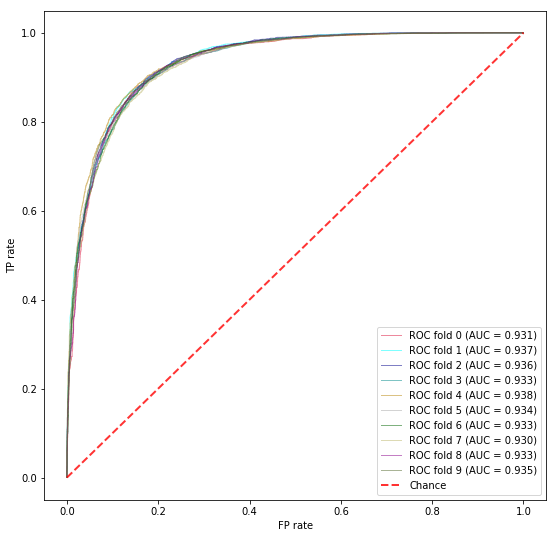

In [197]:
# Cross Validation and training
X = train.drop(['y'], axis = 1)
X = X.values  #Scikit does not like pandas
y = train['y'].values
model.get_n_splits(X,y)
print(model)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
weights = np.zeros([10,3])
n = 0
plt.figure(figsize= (9,9))
colors = ['crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkgreen','darkkhaki','darkmagenta','darkolivegreen']
for train_index, test_index in model.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(y_train)
    w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) # Randomizing the initial w
    dataset = pd.DataFrame({'x1': X_train[:,0],'x2': X_train[:,1],'y': y_train[:]})
    weight, cost = grad_desc(dataset,w,learning_rate,stopping_criteria) # Is going to estimate the eights for every training chunck in my cross_validation
    weights[n] = weight # I save my weights to average after
    
    X_test = pd.DataFrame({'x1': X_test[:,0],'x2': X_test[:,1],'y': y_test[:]})
    X_test.insert(0,'x0',np.array([1]*X_test.shape[0]))
    X_test = X_test.drop(['y'], axis = 1)
    
    y_hat = logistic_prob_2(X_test.values,weight) # I am going to get the probability of my y_hat for every x_test chunk
    
    #y_hat[y_hat<.5] = 0
    #y_hat[y_hat>=.5] = 1 # I make my outputs binary. If I would like to modify something I would change the > 0.5
    
    print(y_hat[0],y_test, len(y_hat[0]), len(y_test)) # checking things
    
    fpr, tpr, threshold = sk.metrics.roc_curve(y_test,y_hat[0])  #false positive / true pos
    roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
    tprs.append(np.interp(mean_fpr, fpr, tpr)) # Append the the positive rates
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)  # append roc curves
    plt.plot(fpr, tpr, lw=1, alpha=0.5,label='ROC fold %d (AUC = %0.3f)' % (n, roc_auc), color = colors[n])
    n += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FP rate')
plt.ylabel('TP rate')

Text(0.5,0,'FR rate')

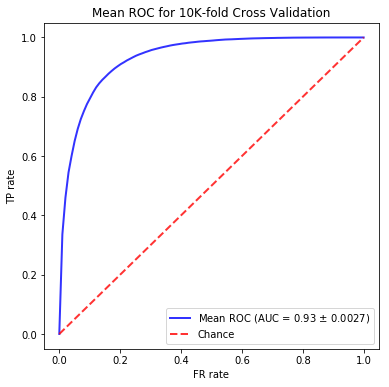

In [24]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sk.metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.figure(figsize = (6,6))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05]) 
plt.legend()
plt.title('Mean ROC for 10K-fold Cross Validation')
plt.ylabel('TP rate')
plt.xlabel('FR rate')

 **Why do we use cross validation?**

We use cross validation to increase the confidence of our metrics. If we create five different models using our learning algorithm (sigmoid function) and we test it on five different test sets (the folds that were not used for train the mode), we can be more confident in our algorithm performance, in other ways we are going to have an average error. If we only train once (with all our splited training dataset) we  are going to have only one result, therefore our estimate of the real error is going to be least precise.

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

The general form of the log-odds (here denoted by y) is:

${\displaystyle l=\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2},} $

Where our vector $W_i$ is equal to $\beta_i$ n  and $y$ is going to be $X_2$

$w[2] * y = w[1] * x + w[0]$

Solving for y:

$y = (w[1] * x)/w[2] + b / w[2]$


In [25]:
avg_w = np.mean(weights, axis= 0)
print('The average weight vector from my 10 K-fold corss validation is [%f,%f,%f]' % (avg_w[0],avg_w[1],avg_w[2]))

The average weight vector from my 10 K-fold corss validation is [-0.188093,-1.923375,-0.418133]


The decision boundary is set as default. If sigma > 0.5 : 1 , else 0 


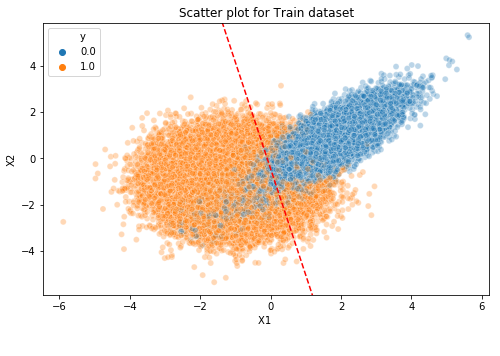

In [26]:
#plt.scatter(train['x1'],train['x2'],color =[colors[c] for c in train['y']])
plt.figure(figsize=(8,5))
g = seaborn.scatterplot(x = 'x1', y ='x2', hue = 'y', alpha = 0.3, data = train)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * avg_w[1] + avg_w[0])/avg_w[2]
plt.plot(x_vals, y_vals, '--', c="red")
plt.title('Scatter plot for Train dataset')
plt.ylabel('X2')
plt.xlabel('X1 \n\n')
print('The decision boundary is set as default. If sigma > 0.5 : 1 , else 0 ')

The decision boundary is set as default. If sigma > 0.5 : 1 , else 0 


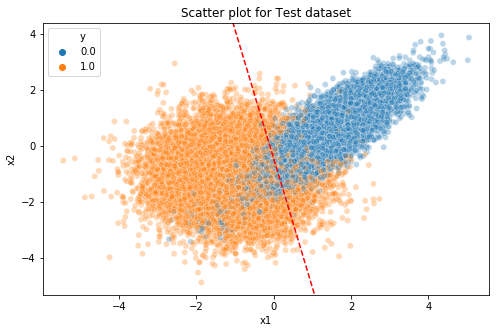

In [27]:
plt.figure(figsize=(8,5))
g = seaborn.scatterplot(x = 'x1', y ='x2', hue = 'y', alpha = 0.3, data = test)
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * avg_w[1] + avg_w[0])/avg_w[2]
plt.plot(x_vals, y_vals, '--', c="red")
plt.title('Scatter plot for Test dataset')
print('The decision boundary is set as default. If sigma > 0.5 : 1 , else 0 ')

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
[1. 0. 0. ... 1. 1. 1.] [1. 0. 0. ... 1. 1. 1.] 7001 7001
[1. 0. 1. ... 1. 0. 0.] [0. 0. 0. ... 0. 0. 0.] 7001 7001
[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.] 7001 7001
[0. 0. 1. ... 0. 0. 0.] [0. 0. 1. ... 0. 0. 0.] 7001 7001
[1. 1. 1. ... 0. 1. 1.] [1. 1. 1. ... 1. 1. 1.] 7001 7001
[1. 0. 0. ... 1. 0. 0.] [0. 0. 0. ... 0. 0. 0.] 6999 6999
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 6999 6999
[0. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.] 6999 6999
[0. 0. 0. ... 0. 1. 0.] [0. 0. 0. ... 0. 1. 0.] 6999 6999
[0. 0. 0. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 1.] 6999 6999


Text(0,0.5,'TP rate')

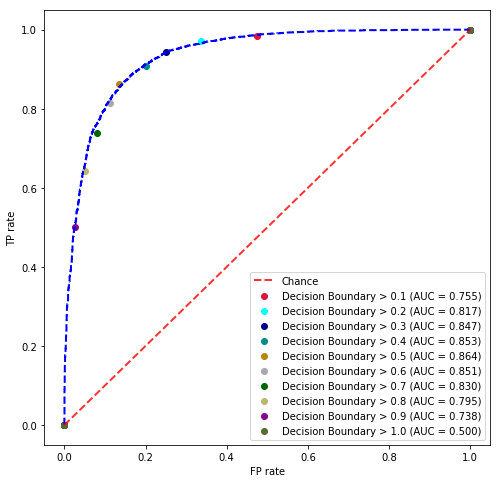

In [200]:
# The next function is going to set different decision boundaries. This is going to allow me to plot the ROC curve for different boundaries.
X = train.drop(['y'], axis = 1)
X = X.values  #Scikit does not like pandas
y = train['y'].values
model.get_n_splits(X,y)
print(model)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
weights = np.zeros([10,3])
n = 0
plt.figure(figsize= (8,8))
colors = ['crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkgreen','darkkhaki','darkmagenta','darkolivegreen']
decision = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for train_index, test_index in model.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(y_train)
    w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) # Randomizing the initial w
    dataset = pd.DataFrame({'x1': X_train[:,0],'x2': X_train[:,1],'y': y_train[:]})
    weight, cost = grad_desc(dataset,w,learning_rate,stopping_criteria) # Is going to estimate the eights for every training chunk in my cross_validation
    weights[n] = weight # I save my weights to average after
    
    X_test = pd.DataFrame({'x1': X_test[:,0],'x2': X_test[:,1],'y': y_test[:]})
    X_test.insert(0,'x0',np.array([1]*X_test.shape[0]))
    X_test = X_test.drop(['y'], axis = 1)
    
    y_hat = logistic_prob_2(X_test.values,weight) # I am going to get the probability of my y_hat for every x_test chunk
    
    y_hat[y_hat< decision[n]] = 0
    y_hat[y_hat>= decision[n]] = 1 # I make my outputs binary. If I would like to modify something I would change the > 0.5
    
    print(y_hat[0],y_test, len(y_hat[0]), len(y_test)) # checking things
    
    fpr, tpr, threshold = sk.metrics.roc_curve(y_test,y_hat[0])  #false positive / true pos
    roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
    tprs.append(np.interp(mean_fpr, fpr, tpr)) # Append the the positive rates
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)  # append roc curves
    plt.scatter(fpr, tpr,label='Decision Boundary > %0.1f (AUC = %0.3f)' % (decision[n], roc_auc), color = colors[n])
    n += 1
    
y_hat = logistic_prob_2(X_test.values,weight)
fpr, tpr, threshold = sk.metrics.roc_curve(y_test,y_hat[0]) 
roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
plt.plot(fpr, tpr, linestyle='--', lw=2, color='b')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05]) 
plt.legend()
plt.xlabel('FP rate')
plt.ylabel('TP rate')

In the case of a Logistic regression model the decision boundary is going to be lineal and it's slope is going to depend on the weights given by my gradient function. 
The former graph shows the ROC curve for the labeled $\hat{y}$ for each fold in a 10 k-fold cross validation. Each fold is using a different decision boundary to predict $\hat{y}$. The graph has the purpose to show how changes in the decision boundary would change the accuracy of my model. I know that is not the most common way to show this (instead of showing the complete curve), but I think is useful to visualize this. 
As it could be observed the  accuracy is  going to be bigger when we use our default decision boundary.



(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

In [207]:
#random model
y_random_guessing = np.random.randint(2,size= test['y'].shape[0])
#weight = np.array([-0.188093,-1.923375,-0.418133])

In [209]:
#My model with the threshold
x_test = test.copy(deep=True)
x_test.insert(0,'x0',np.array([1]*x_test.shape[0]))
x_test = x_test.drop(['y'], axis = 1)
y_hat = logistic_prob_2(x_test.values,weight) # I am going to get the probability of my y_hat for every x_test chunk
print(y_hat)
y_hat_label= y_hat.copy()
y_hat_label[y_hat_label< 0.5] = 0
y_hat_label[y_hat_label>= 0.5] = 1 # I make my outputs binary. If I would like to modify something I would change the > 0.5
print(y_hat_label)

[[0.99302413 0.06853473 0.35026415 ... 0.9355022  0.00209928 0.73529089]]
[[1. 0. 0. ... 1. 0. 1.]]


Text(0.5,1,'ROC for the Sigmoid model compared to Random guessing on the Test data')

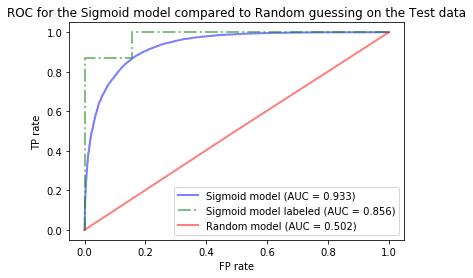

In [211]:
import sklearn  as sk
fpr, tpr, threshold = sk.metrics.roc_curve(test['y'],y_hat[0])  #false positive / true positive for my model
roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
plt.plot(fpr, tpr, lw=2, alpha=0.5,label='Sigmoid model (AUC = %0.3f)' %  roc_auc, color = 'blue')


fpr, tpr, threshold = sk.metrics.roc_curve(test['y'],y_hat_label[0])  #false positive / true positive for my model
roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
plt.step(fpr, tpr, lw=2, alpha=0.5, linestyle = '-.', label='Sigmoid model labeled (AUC = %0.3f)' %  roc_auc, color = 'green')

fpr, tpr, threshold = sk.metrics.roc_curve(test['y'],y_random_guessing)  #My random model
roc_auc = sk.metrics.auc(fpr, tpr)  
plt.plot(fpr, tpr, lw=2, alpha=0.5,label='Random model (AUC = %0.3f)' %  roc_auc, color = 'red')

plt.legend()
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC for the Sigmoid model compared to Random guessing on the Test data')   #plot probabilities

It could be observed that the ROC for the random model follows 45 degrees straight line. This is coherent with the 'chance' line and the AUC displayed ($AUC = 0.504$)
The area under the curve of the sigmoid model is $0.856$, what is the same to say that our model is classifying with an 85,6% accuracy. When we compare the performance of our both models we could observe that the sigmoid model is performing better in clasifiying the data.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

In [3]:
from sklearn.datasets import fetch_mldata
from struct import unpack
# Change data_home to wherever to where you want to download your data
#mnist = fetch_mldata('MNIST', data_home='C:/Users/joaqu/OneDrive/Escritorio/machine-learning-course/Assignment_3/')

In [4]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [282]:
train_img, train_lbl = loadmnist('./MNIST/train-images.idx3-ubyte'
                                 , './MNIST/train-labels.idx1-ubyte')
test_img, test_lbl = loadmnist('MNIST/t10k-images.idx3-ubyte'
                               , 'MNIST/t10k-labels.idx1-ubyte')

In [283]:
train_img.shape
train_lbl.shape

(60000,)

In [284]:
train_lbl[train_lbl != 3] = 0 #Transforming the labels into 0 and 1
train_lbl[train_lbl == 3] = 1
test_lbl[test_lbl != 3] = 0 #Transforming the labels into 0 and 1
test_lbl[test_lbl == 3] = 1

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

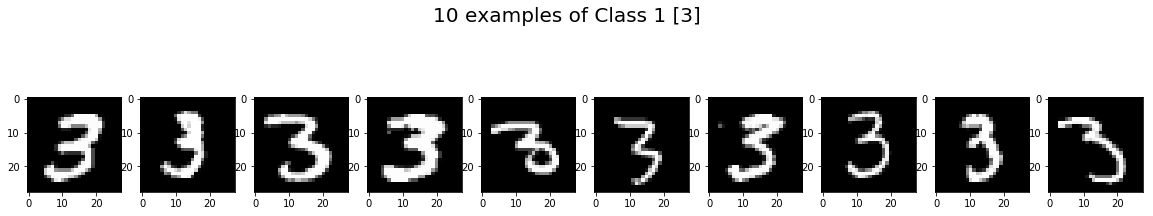

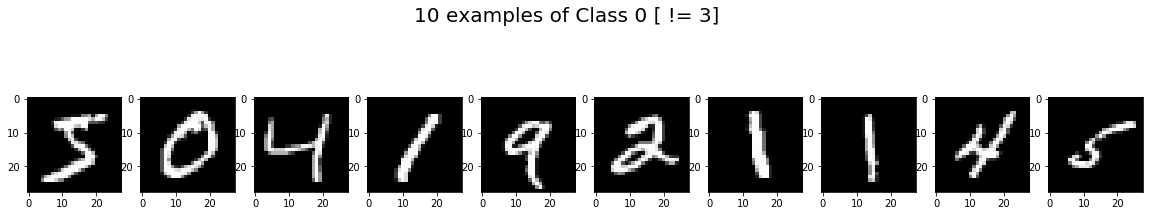

In [285]:
three = train_img[np.where(train_lbl==1)]  # subset of 3
not_three = train_img[np.where(train_lbl!=1)] # Not 3
plt.figure(figsize=(20,4))
for n, image in enumerate(three[0:10]):
    plt.subplot(1, 10, n + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gist_gray)
    plt.suptitle('10 examples of Class 1 [3]', fontsize = 20)
plt.show()

plt.figure(figsize=(20,4))
for n, image in enumerate(not_three[0:10]):
    plt.subplot(1, 10, n + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gist_gray)
    plt.suptitle('10 examples of Class 0 [ != 3]', fontsize = 20)
plt.show()

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

In [286]:
#pd.DataFrame(data = train_lbl).describe()
print('Amount of Class 1: %i' %np.count_nonzero(train_lbl))
print('Amount of Class 0: %i' % (train_lbl.shape[0] - np.count_nonzero(train_lbl)) )
print('Class 1 is only the %.1f' %(np.count_nonzero(train_lbl)/(train_lbl.shape[0] - np.count_nonzero(train_lbl)) * 100), '%')

Amount of Class 1: 6131
Amount of Class 0: 53869
Class 1 is only the 11.4 %


After the class transformation our dataset is unbalanced. There is only a 11 percent of class 1.  The problem of having a class so umbalanced is that the accuracy of our  classifier should be very efficient to improve a simple classifier that labels every image as class 0 (89% of accuracyfor training set). This would be a problem when we'll try to fit our model because it would ocassionate an overfitting of our data to the biggest class, in this case Class 0.


**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

In [32]:
from sklearn.neighbors import KNeighborsClassifier # We are going to use a KNN and learn how to cross validate the N of K that minimize the most the MSE
from sklearn.model_selection import cross_val_score
from sklearn import metrics
neighbors = [3,5,7,11,13,15,17] # 7 neighbors. Whera are going to check what number is more efficient 
                               # (I know is a low N but given the dataset is big we are keeping this small) 
k_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_img[0:3500][:], train_lbl[0:3500], cv=5, scoring='accuracy')  # I  am going to train a small subset divisible by 7
    print(scores.mean())
    k_scores.append(scores.mean())


0.9845710104947735
0.9839991696776057
0.9840008046663652
0.9825697819208378
0.9811424332352864
0.9799999813410698
0.9794281451886345


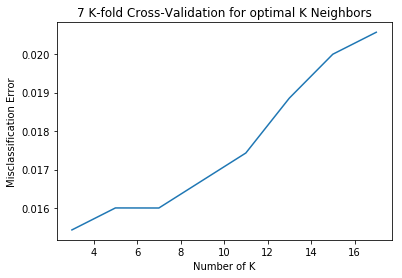

In [33]:
# The function cross_val_scores output an estimator of the accuracy of every K_fold. Given the fact that we want to select the K-fold that better minimize the error
# We are going to use the misclassification error.
miss_error = [1 - k_scores for k_scores in k_scores]
plt.plot(neighbors, miss_error)
plt.xlabel('Number of K')
plt.ylabel('Misclassification Error')
plt.title('7 K-fold Cross-Validation for optimal K Neighbors')
plt.show()

In [36]:
print('The N of K that minimize the error the most is %i K' % neighbors[miss_error.index(min(miss_error))])

The N of K that minimize the error the most is 3 K


In [253]:
# the three models
knn = KNeighborsClassifier(n_neighbors = neighbors[miss_error.index(min(miss_error))])
knn.fit(X=train_img,y=train_lbl) #training
knn_predict = knn.predict(test_img)
knn_proba = knn.predict_proba(test_img) # knn model with probabilities

In [339]:
y_random_guessing = np.random.randint(2,size= test_lbl.shape[0])  #random model
y_all_1 = np.array([0] * test_lbl.shape[0])  #everything is class 0!!!! The name of the variable is wrong
np.std(y_all_1),y_all_1.mean(),len(y_all_1)
y_all_0 = [0] * test_lbl.shape[0]

[0. 1.] [0. 1.] [0.         0.50100111 1.        ] [0.         0.51089109 1.        ]


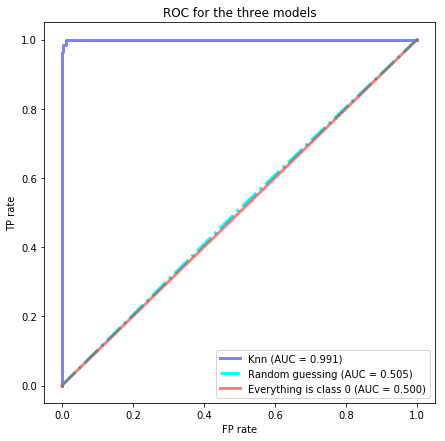

In [342]:
plt.figure(figsize=(7,7))
fpr, tpr, threshold = metrics.roc_curve(test_lbl,knn_proba[:, 1])  #false positive / true positive for my model
roc_auc = metrics.auc(fpr, tpr)  # estimate area under curve
plt.step(fpr, tpr, lw=3, alpha=0.5,label='Knn (AUC = %0.3f)' %  roc_auc, color = 'blue')

fpr, tpr, threshold = metrics.roc_curve(test_lbl,y_random_guessing)  
roc_auc = metrics.auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, alpha=1, linestyle = '-.',label='Random guessing (AUC = %0.3f)' %  roc_auc, color = 'cyan')

afpr, atpr, threshold = metrics.roc_curve(test_lbl,y_all_1)  
roc_auc = metrics.auc(afpr, atpr)  
plt.plot(afpr, atpr, lw=3, alpha=0.5, linestyle = '-',label='Everything is class 0 (AUC = %0.3f)' %  roc_auc, color = 'red')

plt.legend()
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC for the three models') 

print(afpr,atpr, fpr,tpr)

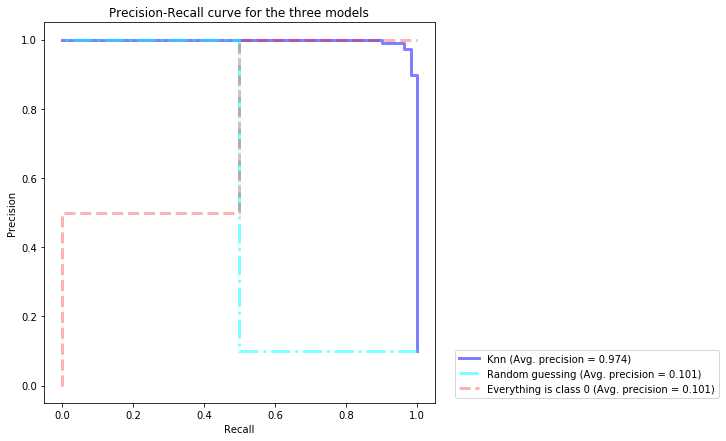

In [287]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


plt.figure(figsize=(7,7))
precision, recall, threshold = metrics.precision_recall_curve(test_lbl,knn_proba[:, 1])  # KNN
average_precision = average_precision_score(test_lbl, knn_proba[:, 1])
plt.step(recall, precision, lw=3, alpha=0.5,label='Knn (Avg. precision = %0.3f)' %  average_precision, color = 'blue')


precision, recall, threshold = metrics.precision_recall_curve(test_lbl,y_random_guessing)  #Random
average_precision = average_precision_score(test_lbl, y_random_guessing)
plt.step(recall, precision, lw=3, linestyle = '-.', alpha=0.5,label='Random guessing (Avg. precision = %0.3f)' %  average_precision, color = 'cyan')

precision, recall, threshold = metrics.precision_recall_curve(test_lbl,y_all_0)  #all 1
average_precision = average_precision_score(test_lbl, y_all_0)
plt.step(fpr, tpr, lw=3, alpha=0.3, linestyle = '--',label='Everything is class 0 (Avg. precision = %0.3f)' %  average_precision, color = 'red')

#plt.grid(b =True, axis='both', which='both')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for the three models')
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left")

When we compare the performance of our distinct models using our ROC we find that model 1 and 2 (random model and everything is class 1 respectively) present values similar to chance. This behavior was the expected for the first model, but not for the second one. We would expect a TP rate of approximately 0. Despite of that we observe that the are under the curve shows a exact 0.5 value. This is due that the FP rate is 1. 
The KNN model we implemented (KNN with K = 3) shows an AUC = 0.991. It seems that our model is performing extremely good at the moment to classify. If we take in consideration that we needed a model that behave at least with better accuracy than 89% , we could say that KNN seems to acomplish this objective. A possible problem would be that our model is predicting that almost everything is a 3. To have a more detailed insight about this we would like to see other metrics

When we observe the precision recall curve we can see that the KNN model presents a very high precision, this means that the fraction of positive instances among the retrieved instances is near one, in other words the amount of classes labeled incorrectly as 0 or 'Not number 3' when they weren't is low. So, is able to correctly say that a number is 3 without saying that other numbers are 3's. This is something really good, despite of having a very unbalance sample the algorithm is correctly indentifiying our target. On the other hand, we could observe that the precision for our `Random`  and `Everything is 0` models have, as expected, a precision near 10%.

In [335]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(test_lbl, knn_predict).ravel()
conf = pd.DataFrame(index= ['+','-'], columns= ['POS' , 'NEG'] , data = np.array([[tp,fn],[fp,tn]]))
conf.insert(2, 'TOTAL', np.array([tp+fn,fp+tn]))
conf.iloc[0,0:2] = conf.iloc[0,0:2]/conf.iloc[0,2] # I calculate the rates
conf.iloc[1,0:2] = conf.iloc[1,0:2]/conf.iloc[1,2]
print('Confusion Matrix KNN')
conf



Confusion Matrix KNN


,POS,NEG,TOTAL
+,0.964356,0.035644,1010
-,0.003003,0.996997,8990


In [336]:
tn, fp, fn, tp = confusion_matrix(test_lbl, y_all_1).ravel()
conf = pd.DataFrame(index= ['+','-'], columns= ['POS' , 'NEG'] , data = np.array([[tp,fn],[fp,tn]]))
conf.insert(2, 'TOTAL', np.array([tp+fn,fp+tn]))
conf.iloc[0,0:2] = conf.iloc[0,0:2]/conf.iloc[0,2] # I calculate the rates
conf.iloc[1,0:2] = conf.iloc[1,0:2]/conf.iloc[1,2]
print('Confusion Matrix for all class 0')
conf

Confusion Matrix for all class 0


,POS,NEG,TOTAL
+,0.0,1.0,1010
-,0.0,1.0,8990


In [337]:
tn, fp, fn, tp = confusion_matrix(test_lbl, y_random_guessing).ravel()
conf = pd.DataFrame(index= ['+','-'], columns= ['POS' , 'NEG'] , data = np.array([[tp,fn],[fp,tn]]))
conf.insert(2, 'TOTAL', np.array([tp+fn,fp+tn]))
conf.iloc[0,0:2] = conf.iloc[0,0:2]/conf.iloc[0,2] # I calculate the rates
conf.iloc[1,0:2] = conf.iloc[1,0:2]/conf.iloc[1,2]
print('Confusion Matrix Random guess')
conf

Confusion Matrix Random guess


,POS,NEG,TOTAL
+,0.498020,0.501980,1010
-,0.498554,0.501446,8990


**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**